<h1>Práctica 1: Regresión lineal con R (2da parte)</h1>

<i>
Maximiliano Vaca Montejano <br>
364897 <br>
maximiliano.vaca@uabc.edu.mx
</i>

<h2>Ejercicio 2 </h2>

Deseamos investigar la relación entre la distancia de frenado de un auto y la
velocidad al momento en que el conductor se encuentra con un señalamiento
de alto. Se supone que el tiempo de reacción para que el conductor aplique
los frenos es aproximadamente fijo, por lo que el auto viajará una distancia
proporcional a su velocidad antes de comenzar a parar. Por otro lado, la energía cinética es proporcional al cuadrado de su velocidad, pero los frenos disipan esa energía y <b>bajan la velocidad a una razón aproximadamente constante por unidad de distancia recorrida.</b> Por lo que esperamos que una vez que se apliquen los frenos, el auto viaje una distancia proporcional al cuadrado de su velocidad inicial antes de parar completamente. <br>
Dada la información anterior, un modelo inicial es 

$$ dist_i = \beta_0 + \beta_1 speed_i + \beta_2 speed_i^2 + \epsilon$$

<b>(a)</b> Ajuste un modelo comenzando con esta propuesta inicial y seleccione el que considere más adecuado. <br>
<b>(b)</b> Para su modelo óptimo estime el tiempo promedio que le toma al conductor aplicar los frenos (hay 5280 pies en una milla).<br>
<b>(c)</b> Grafique los datos y la estimación de cada modelo en una sola figura<br>
<b>(d)</b> Nota: los datos se pueden acceder a través del comando: <i>data(cars)</i>

* investigamos el sistema en el que estan medidos los datos, para despues pasarlos al sistema internacional y que sean mas comprensibles

In [2]:
data(cars)

# añadimos una columna con las velocidades en metros/segundos
cars$speed_mps <- cars$speed * 1609.34 / 3600

# añadimos una columna con las distancias en metros
cars$dist_m <- cars$dist * 0.3048

head(cars)

,speed,dist,speed_mps,dist_m
,<dbl>,<dbl>,<dbl>,<dbl>
1,4,2,1.788156,0.6096
2,4,10,1.788156,3.0480
3,7,4,3.129272,1.2192
4,7,22,3.129272,6.7056
5,8,16,3.576311,4.8768
6,9,10,4.023350,3.0480


* graficamos los datos para observar su forma y hacernos una idea del modelo adecuado 

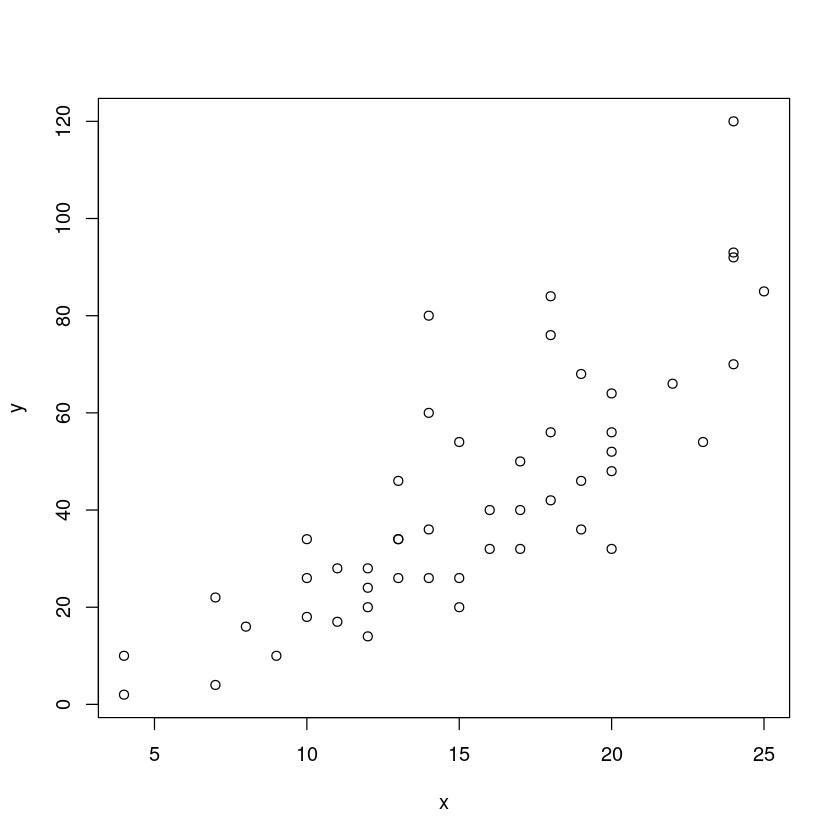

In [3]:
x = cars$speed ; y = cars$dist
plot(x, y)

<b>(a)</b> Ajuste un modelo comenzando con esta propuesta inicial y seleccione el que considere más adecuado. <br>

In [5]:
library(gamair)

* primero intentamos con el modelo cuadratico propuesto al principio

In [6]:
cars.mod_1 <- lm(dist ~ speed + I(speed^2), data=cars)

summary(cars.mod_1)


Call:
lm(formula = dist ~ speed + I(speed^2), data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.720  -9.184  -3.188   4.628  45.152 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.47014   14.81716   0.167    0.868
speed        0.91329    2.03422   0.449    0.656
I(speed^2)   0.09996    0.06597   1.515    0.136

Residual standard error: 15.18 on 47 degrees of freedom
Multiple R-squared:  0.6673,	Adjusted R-squared:  0.6532 
F-statistic: 47.14 on 2 and 47 DF,  p-value: 5.852e-12


se obtienen los valores: <br>
<b>Multiple R-squared:  0.6673,	Adjusted R-squared:  0.6532 </b><br>
los cuales no son muy buenos

* Como se observó en la grafica, tiene sentido suponer que la intersección del modelo pase por el origen. Es por esto que optamos por fijar la intersección en el origen con ese parametro "-1" a ver si mejora nuestro modelo 

In [120]:
cars.mod_2 <- lm(dist_m ~ speed + I(speed^2) -1, data=cars)

summary(cars.mod_2)


Call:
lm(formula = dist_m ~ speed + I(speed^2) - 1, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7892 -2.7648 -0.9608  1.3929 13.7118 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)   
speed      0.377656   0.170679   2.213  0.03171 * 
I(speed^2) 0.027474   0.008958   3.067  0.00355 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.579 on 48 degrees of freedom
Multiple R-squared:  0.9133,	Adjusted R-squared:  0.9097 
F-statistic: 252.8 on 2 and 48 DF,  p-value: < 2.2e-16


se obtienen los valores: <br>
<b>Multiple R-squared:  0.9133,	Adjusted R-squared:  0.9097 </b><br>
presentando una mejora significativa respecto al modelo anterior

* Los resultados anteriores parecian bastante satisfactorios, pero nos preguntamos que pasaría si quitamos el termino cuadratico del modelo, dado que a simple vista los datos no parecen necesitarlo

In [121]:
cars.mod_3 <- lm(dist ~ speed -1, data=cars)

summary(cars.mod_3)


Call:
lm(formula = dist ~ speed - 1, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.183 -12.637  -5.455   4.590  50.181 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
speed   2.9091     0.1414   20.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.26 on 49 degrees of freedom
Multiple R-squared:  0.8963,	Adjusted R-squared:  0.8942 
F-statistic: 423.5 on 1 and 49 DF,  p-value: < 2.2e-16


se obtienen los valores: <br>
<b>Multiple R-squared:  0.8963,	Adjusted R-squared:  0.8942  </b><br>
presentando una pequeña disminución respecto al modelo anterior, pero aun así superando bastante al primero 

un modelo mas adecuado es el de <b>cars.mod_2</b>, con: <i>Multiple R-squared:  0.9133 y Adjusted R-squared:  0.9097</i>


$$ dist_i = \beta_0 speed_i + \beta_1 speed_i^2 + \epsilon_i $$

Donde: <br>
<ul>
<li> dist_i es la distancia de frenado del i-ésimo auto.
<li> speed_i$ es la velocidad del i-ésimo auto al momento de aplicar los frenos.
<li> beta_1, beta_2 son los coeficientes del modelo.
<li> epsilon_i es el error aleatorio asociado con el i-ésimo auto.
</ul>

Donde encontramos que <br>
<b>β_0 =  1.23903</b> y <br>
<b>β_1 =  0.09014</b>


$$ tiempo_{frenado} = \frac{distancia}{velocidad} $$

<b>(b)</b> Para su modelo óptimo estime el tiempo promedio que le toma al conductor aplicar los frenos (hay 5280 pies en una milla).<br>

* Sacamos la media a la distancia de frenado, solo para explorar

In [122]:
dist_media = mean(cars$dist_m)

dist_media

[1] 13.1003

* aplicamos nuestro modelo a los arreglos de datos

In [123]:
modelo_dist_arr = 1.23903 * cars$speed_mps + 0.09014 * (cars$speed_mps)^2

* sacamos la media de dicho arreglo

In [124]:
mean_modelo_dist = mean(modelo_dist_arr)

mean_modelo_dist

[1] 13.29574

se obtiene un valor similar a la media de los datos originales, lo cual es un buen indicio ya que nuestro modelo no incluye dicha distancia, solo la infiere de las velocidades

* obtenemos el tiempo promedio de frenado

In [125]:
tiempo_prom = mean_modelo_dist / mean(cars$speed_mps)

tiempo_prom

[1] 1.931285

el tiempo promedio de frenado es de 1.93128534838846 segundos

<b>(c)</b> Grafique los datos y la estimación de cada modelo en una sola figura<br>

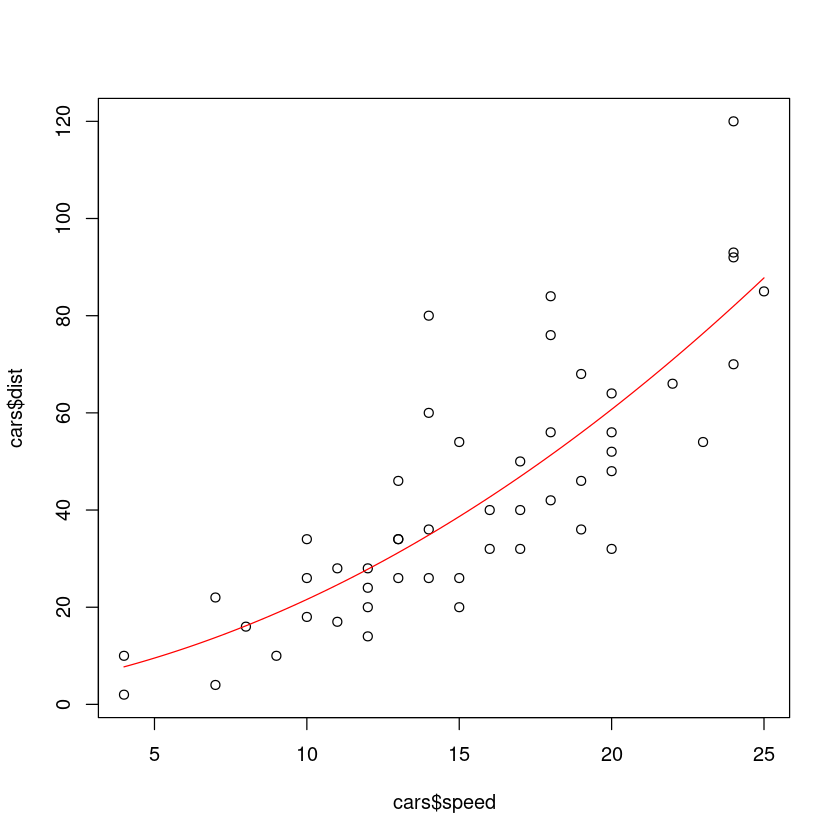

In [126]:
plot(cars$speed, cars$dist)

#graficamos el 1er modelo (el peor segun los parametros R) trazando la parabola con los coeficientes de regresion obtenidos del modelo
curve(expr = 2.47014 + 0.91329*x +0.09996*x^2, from = min(cars$speed), to = max(cars$speed), add = TRUE, col = "red")

* Graficamos el segundo modelo (el mejor segun los parametros R^2) trazando la parabola con los coeficientes de regresion obtenidos del modelo

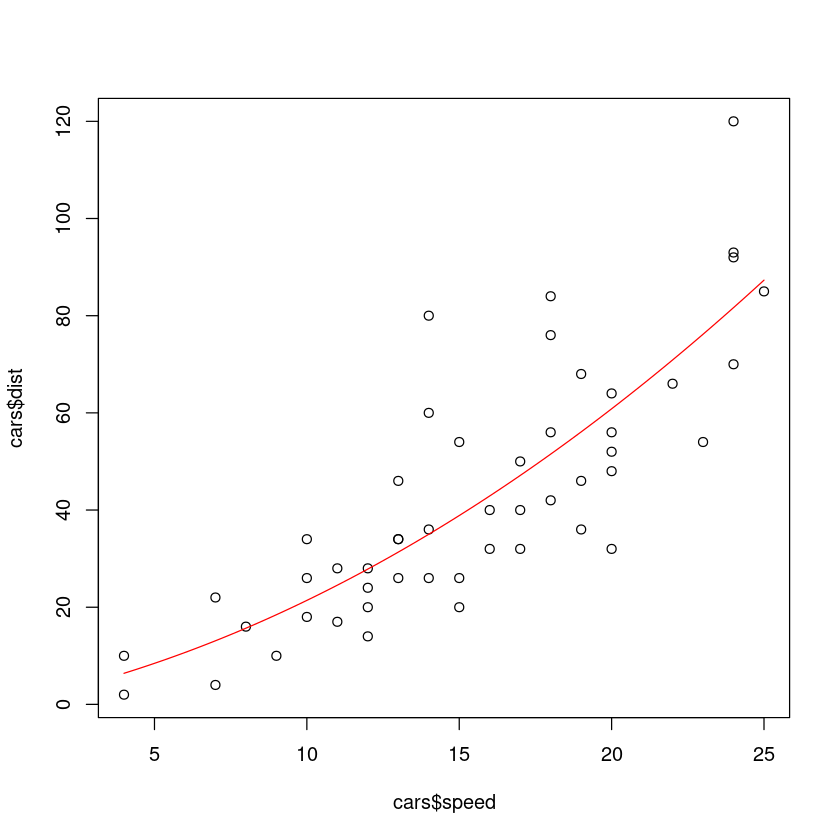

In [127]:
plot(cars$speed, cars$dist)

#graficamos el segundo modelo (el mejor segun los parametros R) trazando la parabola con los coeficientes de regresion obtenidos del modelo
curve(expr = 1.23903*x +0.09014*x^2, from = min(cars$speed), to = max(cars$speed), add = TRUE, col = "red")

* Graficamos el 3er modelo (el segundo mejor segun los parametros R^2) trazando la recta con los coeficientes de regresion obtenidos del modelo

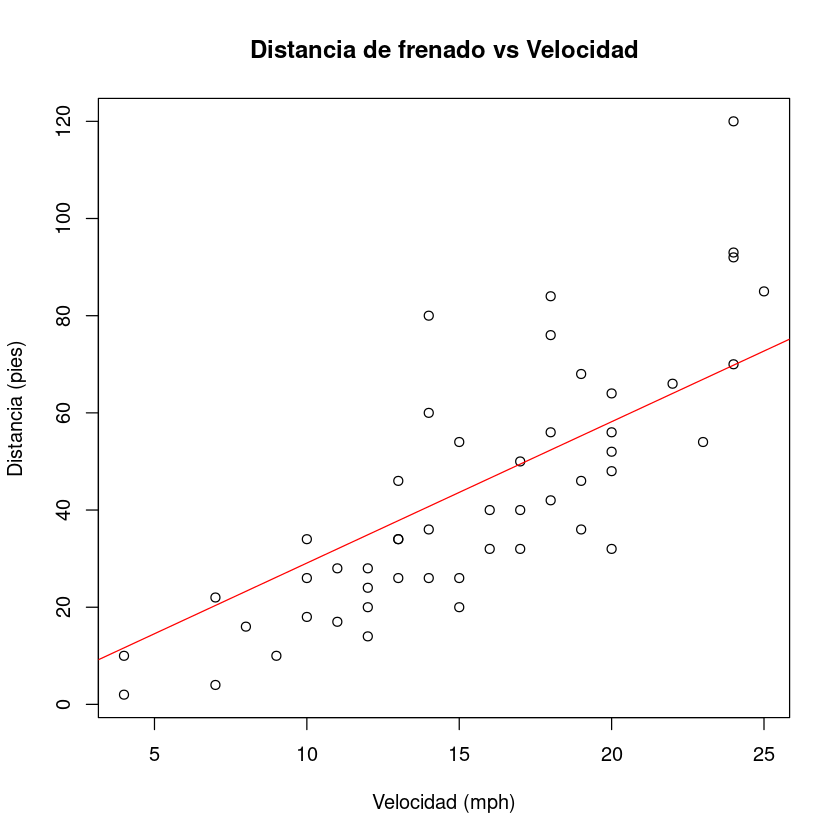

In [128]:
plot(cars$speed, cars$dist, xlab = "Velocidad (mph)", ylab = "Distancia (pies)", main = "Distancia de frenado vs Velocidad")

#graficamos el tercer modelo con esta funcion, al parecer solo funciona para lineas rectas
abline(cars.mod_3, col = "red")